In [1]:
import sys

import torch

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib as jl
import cebra.datasets
from cebra import CEBRA

from matplotlib.collections import LineCollection
import pandas as pd

In [2]:
data_470 = pd.read_csv('/Users/haotianli/Documents/MATLAB/behaviorAnalysis/Data_470.csv')
data_555 = pd.read_csv('/Users/haotianli/Documents/MATLAB/behaviorAnalysis/Data_555.csv')

data_470 = data_470.to_numpy()
data_555 = data_555.to_numpy()

data_470_tensor = torch.tensor(data_470)
data_555_tensor = torch.tensor(data_555)

In [3]:
# Unit 15 frames(0.6s at 25 Hz)


In [4]:
max_iterations = 5000

cebra_time3_model = CEBRA(model_architecture='offset10-model',
                        batch_size=512,
                        learning_rate=3e-4,
                        temperature=1.12,
                        output_dimension=3,
                        max_iterations=max_iterations,
                        distance='cosine',
                        conditional='time',
                        device='cuda_if_available',
                        verbose=True,
                        time_offsets=10)

In [5]:
cebra_time3_model.fit(data_470_tensor)
cebra_time3 = cebra_time3_model.transform(data_470_tensor)

pos: -0.5838 neg:  6.3693 total:  5.7854 temperature:  1.1200: 100%|██████████| 5000/5000 [00:48<00:00, 102.39it/s]


In [6]:
def plot_hippocampus(ax, embedding, gray = False, idx_order = (0,1,2)):
    label = torch.ones(2249, 2)
    
    r_ind = label[:,0] == 1
    l_ind = label[:,1] == 1

    if not gray:
        r_cmap = 'cool'
        l_cmap = 'viridis'
        r_c = label[r_ind, 0]
        l_c = label[l_ind, 0]
    else:
        r_cmap = None
        l_cmap = None
        r_c = 'gray'
        l_c = 'gray'

    idx1, idx2, idx3 = idx_order
    r=ax.scatter(embedding [r_ind,idx1],
               embedding [r_ind,idx2],
               embedding [r_ind,idx3],
               c=r_c,
               cmap=r_cmap, s=0.5)
    l=ax.scatter(embedding [l_ind,idx1],
               embedding [l_ind,idx2],
               embedding [l_ind,idx3],
               c=l_c,
               cmap=l_cmap, s=0.5)

    ax.grid(False)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')
    ax.zaxis.pane.set_edgecolor('w')

    return ax

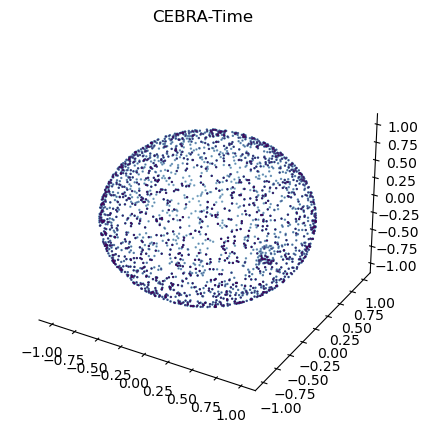

In [12]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
# 创建一个图形并设置大小
fig = plt.figure(figsize=(5, 5))

# 创建一个3D子图
ax3 = plt.subplot(111, projection='3d')

# 绘制数据到子图
ax3 = plot_hippocampus(ax3, cebra_time3)

# 设置子图的标题
ax3.set_title('CEBRA-Time')

# 显示图形
plt.show()